# EDA

### 1. Class Distribution Visualization:

The number of images per class are plotted ausing a bar plot to visualize the class distribution. This will help identify any class imbalance issues that might affect the model's performance.

In [2]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from PIL import Image
import numpy as np

# Path to the a fish dataset in tensorflow format
path_to_fish_dataset = '//kaggle/input/plus20fish-saiab/morethan20fish_SAIAB/morethan20fish_SAIAB'

# List of classes 
class_names = os.listdir(path_to_fish_dataset)

In [4]:
# Step 1A: Class Distribution 
# Create a list of tuples containing class names and their respective image counts
class_counts = [(cls, len(os.listdir(os.path.join(path_to_fish_dataset, cls)))) for cls in class_names]

# Sort classes in descending order based on image counts
sorted_class_counts = sorted(class_counts, key=lambda x: x[1], reverse=True)

# Count total number of images and classes in the dataset
total_images = sum([count for _, count in sorted_class_counts])
total_classes = len(sorted_class_counts)

# Print total number of images, classes, and class information
print(f"Total number of images in the dataset: {total_images}")
print(f"Total number of classes in the dataset: {total_classes}\n")

for cls, class_count in sorted_class_counts:
    print(f"{cls}: {class_count} images")


Total number of images in the dataset: 1709
Total number of classes in the dataset: 39

Pseadanthias squamipinnis: 219 images
Caesio xanthonota: 189 images
Pterocaesio tile: 127 images
Thalassoma amblycephalum: 121 images
Dascyllus aruanus: 46 images
Lutjanus monostigma: 44 images
Chromis viridis: 44 images
Amphiprion akallopsis: 43 images
Dascyllus reticulatus: 43 images
Naso hexacanthus: 42 images
Lethrinus rubioperculatus: 39 images
Caesio caerulaura: 38 images
Heniochus acuminatus: 37 images
Siganus luridus: 37 images
Chromis weberi: 37 images
Heniochus diphreutes: 34 images
Caesio lunaris: 33 images
Acanthurus triostegus: 33 images
Abudefduf vaigiensis: 29 images
Gnathodentex aureolineatus: 28 images
Pomacentrus pavo: 28 images
Scarus rubroviolaceus: 26 images
Sphyraena qenie: 26 images
Acanthurus thompsoni: 26 images
Chaetodon trifasciatus: 26 images
Odonus niger: 25 images
Dascyllus trimaculatus: 24 images
Acanthurus lineatus: 24 images
Scarus ghobban: 24 images
Chromis ternaten

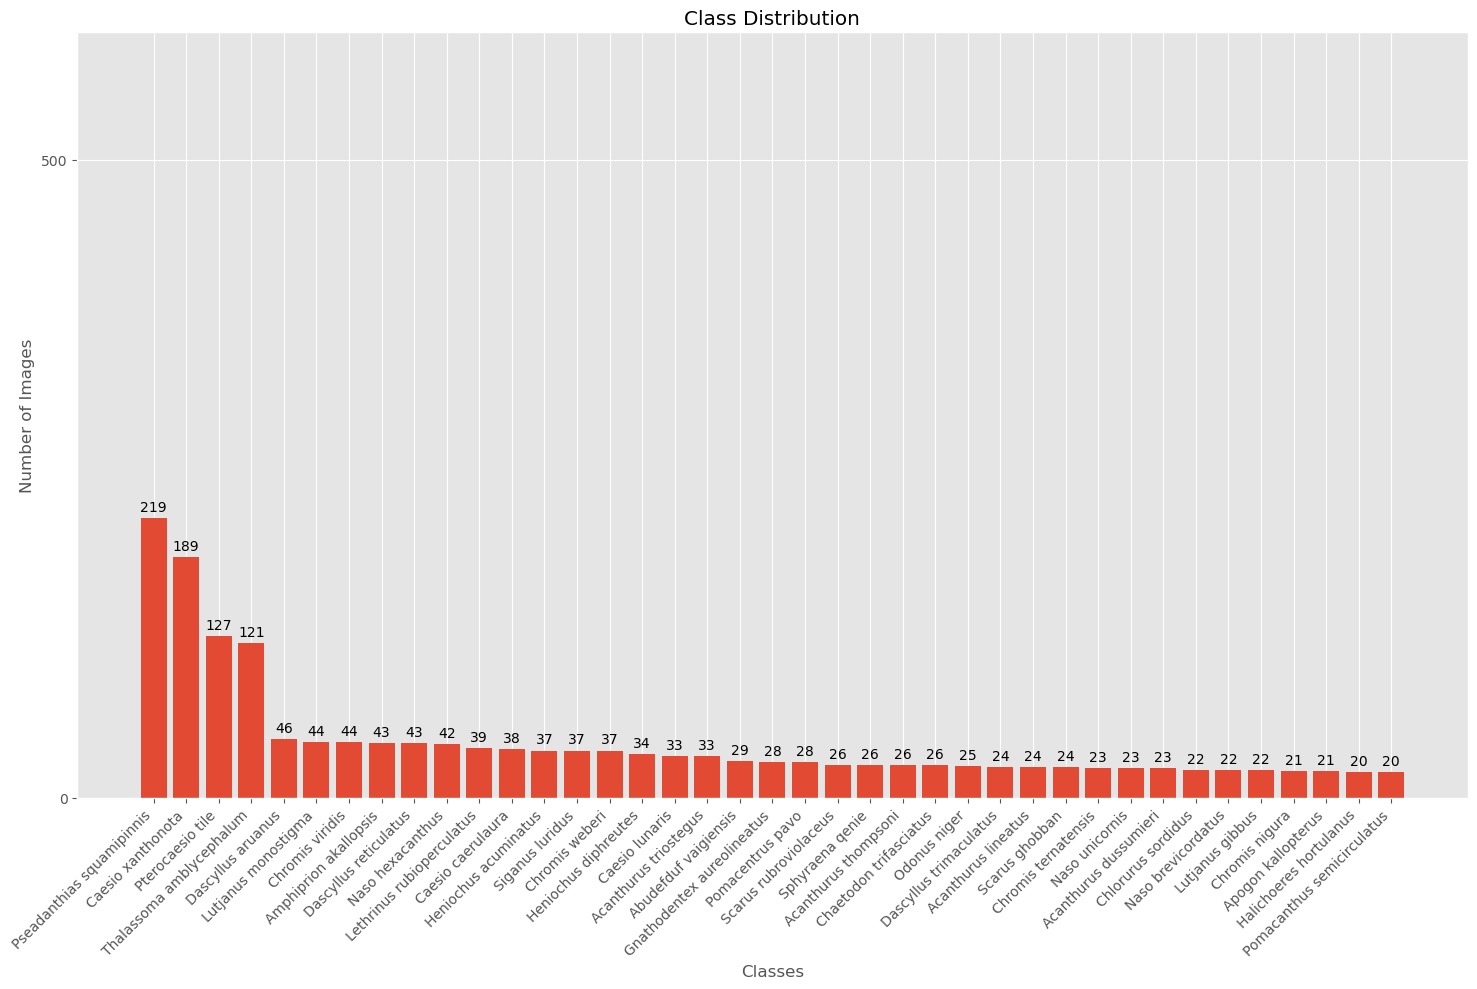

In [5]:
# Step 1B: Class Distribution Visualization (Bar Plot)
class_counts = [len(os.listdir(os.path.join(path_to_fish_dataset, cls))) for cls in class_names]

# Sort class names and counts in descending order
sorted_indices = sorted(range(len(class_counts)), key=lambda k: class_counts[k], reverse=True)
sorted_class_names = [class_names[i] for i in sorted_indices]
sorted_class_counts = [class_counts[i] for i in sorted_indices]

# Increase the figure size
plt.figure(figsize=(15, 10))

# Create the bar plot
bars = plt.bar(sorted_class_names, sorted_class_counts)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha='right')  

# Set y-axis limit for better visualization
y_limit = np.ceil(max(sorted_class_counts) / 500) * 500 + 100  
plt.ylim(0, y_limit)

# Set y-axis ticks in buckets of 500s
plt.yticks(np.arange(0, y_limit+1, 500))

# Add total counts above each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

# Adjusting layout to prevent label cutoff
plt.tight_layout()  
plt.show()


# Benchmark Training

## 2. Sample Image Visualization

A few sample images from each class are randomly select and displayed. This can help to get a visual sense of the variety of images within each class and identify any potential challenges in classification due to variations in lighting, angle, size, etc.

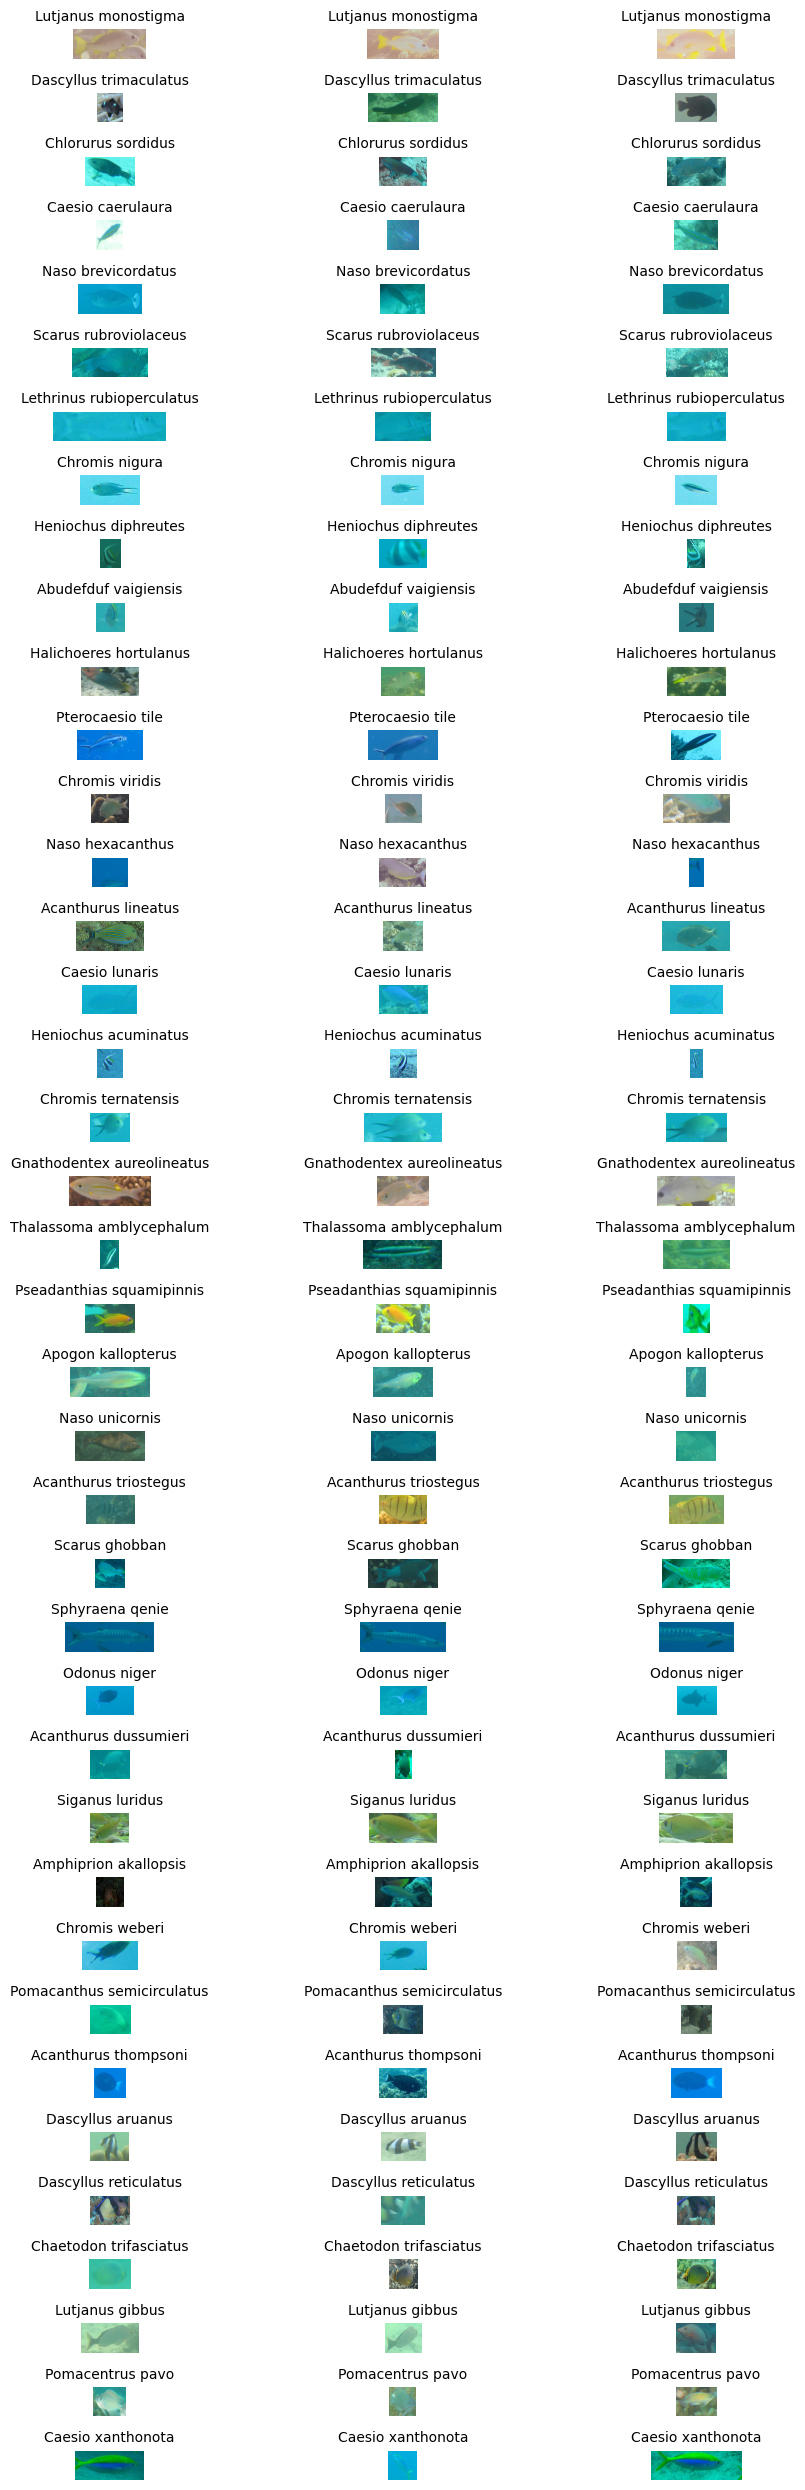

In [6]:
# Step 2: Sample Image Visualization
num_samples_per_class = 3
fig, axes = plt.subplots(len(class_names), num_samples_per_class, figsize=(10, 25))  # Adjust figsize
for i, cls in enumerate(class_names):
    image_files = os.listdir(os.path.join(path_to_fish_dataset, cls))
    sample_images = np.random.choice(image_files, num_samples_per_class, replace=False)
    for j, img_file in enumerate(sample_images):
        img_path = os.path.join(path_to_fish_dataset, cls, img_file)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(cls, fontsize=10)  # Adjust fontsize
plt.tight_layout()
plt.show()


# Data Preparation

### A. Data Processing
* Normalise the images

### B. Data Split
* USE A 70,20,10 split to divide the dataset into train, validation, and test sets

In [4]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define paths to your dataset
path_to_fish_datasetectory = path_to_fish_dataset
batch_size = 32
image_size = (224, 224)

# Create training, validation, and test datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    path_to_fish_datasetectory,
    validation_split=0.3,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    path_to_fish_datasetectory,
    validation_split=0.3,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

# Retrieve class names
class_names = train_dataset.class_names

# Further split validation into validation and test
val_size = int(0.67 * len(test_dataset))
val_dataset = test_dataset.take(val_size)
test_dataset = test_dataset.skip(val_size)

 # Normalize images
def preprocess_images(images, labels):
    images = images / 255.0  
    return images, labels

train_dataset = train_dataset.map(preprocess_images)
val_dataset = val_dataset.map(preprocess_images)
test_dataset = test_dataset.map(preprocess_images)

# One-hot encode labels
num_classes = len(class_names)
train_dataset = train_dataset.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
val_dataset = val_dataset.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
test_dataset = test_dataset.map(lambda x, y: (x, tf.one_hot(y, num_classes)))

# Print class names
print("Class names:", class_names)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Found 1709 files belonging to 39 classes.
Using 1197 files for training.
Found 1709 files belonging to 39 classes.
Using 512 files for validation.
Class names: ['Abudefduf vaigiensis', 'Acanthurus dussumieri', 'Acanthurus lineatus', 'Acanthurus thompsoni', 'Acanthurus triostegus', 'Amphiprion akallopsis', 'Apogon kallopterus', 'Caesio caerulaura', 'Caesio lunaris', 'Caesio xanthonota', 'Chaetodon trifasciatus', 'Chlorurus sordidus', 'Chromis nigura', 'Chromis ternatensis', 'Chromis viridis', 'Chromis weberi', 'Dascyllus aruanus', 'Dascyllus reticulatus', 'Dascyllus trimaculatus', 'Gnathodentex aureolineatus', 'Halichoeres hortulanus', 'Heniochus acuminatus', 'Heniochus diphreutes', 'Lethrinus rubioperculatus', 'Lutjanus gibbus', 'Lutjanus monostigma', 'Naso brevicordatus', 'Naso hexacanthus', 'Naso unicornis', 'Odonus niger', 'Pomacanthus semicirculatus', 'Pomacentrus pavo', 'Pseadanthias squamipinnis', 'Pterocaesio tile', 'Scarus ghobban', 'Scarus rubroviolaceus', 'Siganus luridus', '

## Keras Tuner

In [6]:
pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [7]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import time

def model_builder(hp):
    # Create the base model
    base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Add classification head on top of the base model
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=predictions)


    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Compile the model with additional metrics
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])
    
    return model

tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='model',
                     project_name='fish_kt')

# Define callbacks for saving models based on validation loss and early stopping
model_checkpoint_best = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
# model_checkpoint_last = ModelCheckpoint('last_model.h5', save_best_only=False, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Search for the best hyperparameters
tuner.search(train_dataset, epochs=50, validation_data=val_dataset, callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""The hyperparameter search is complete. The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.""")

Trial 3 Complete [00h 00m 51s]
val_loss: 1.4588321447372437

Best val_loss So Far: 1.4588321447372437
Total elapsed time: 00h 03m 26s
The hyperparameter search is complete. The optimal learning rate for the optimizer is 0.0001.


In [8]:
# Build the model with the optimal hyperparameters and train for 50 epochs
model = tuner.hypermodel.build(best_hps)

# Start timing the training
start_time = time.time()
# Train the model with callbacks
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[model_checkpoint_best, early_stopping])

# Calculate the training time
end_time = time.time()
training_time_seconds = end_time - start_time
training_time_minutes = training_time_seconds / 60.0  # Convert to minutes

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

print(f"training_time = {training_time_minutes}")

Epoch 1/50
38/38 [==============================] - ETA: 0s - loss: 2.4989 - accuracy: 0.4085 - precision: 0.9341 - recall: 0.2013
Epoch 1: val_loss improved from inf to 2.46100, saving model to best_model.h5
38/38 [==============================] - 37s 247ms/step - loss: 2.4989 - accuracy: 0.4085 - precision: 0.9341 - recall: 0.2013 - val_loss: 2.4610 - val_accuracy: 0.4344 - val_precision: 0.6686 - val_recall: 0.3656
Epoch 2/50
38/38 [==============================] - ETA: 0s - loss: 0.8165 - accuracy: 0.8521 - precision: 0.9936 - recall: 0.6525
Epoch 2: val_loss improved from 2.46100 to 1.53885, saving model to best_model.h5
38/38 [==============================] - 9s 232ms/step - loss: 0.8165 - accuracy: 0.8521 - precision: 0.9936 - recall: 0.6525 - val_loss: 1.5389 - val_accuracy: 0.6313 - val_precision: 0.7607 - val_recall: 0.5562
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 0.2183 - accuracy: 0.9683 - precision: 0.9945 - recall: 0.9039
Epoch 3: val_loss im

In [9]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_dataset)
print("Test accuracy:", test_accuracy)
print("Test precision:", test_precision)
print("Test recall:", test_recall)



6/6 [==============================] - 1s 57ms/step - loss: 0.6248 - accuracy: 0.8490 - precision: 0.9133 - recall: 0.8229
Test accuracy: 0.8489583134651184
Test precision: 0.913294792175293
Test recall: 0.8229166865348816


In [10]:
# Access training metrics from history
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
train_precision = history.history['precision']
train_recall = history.history['recall']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_precision = history.history['val_precision']
val_recall = history.history['val_recall']

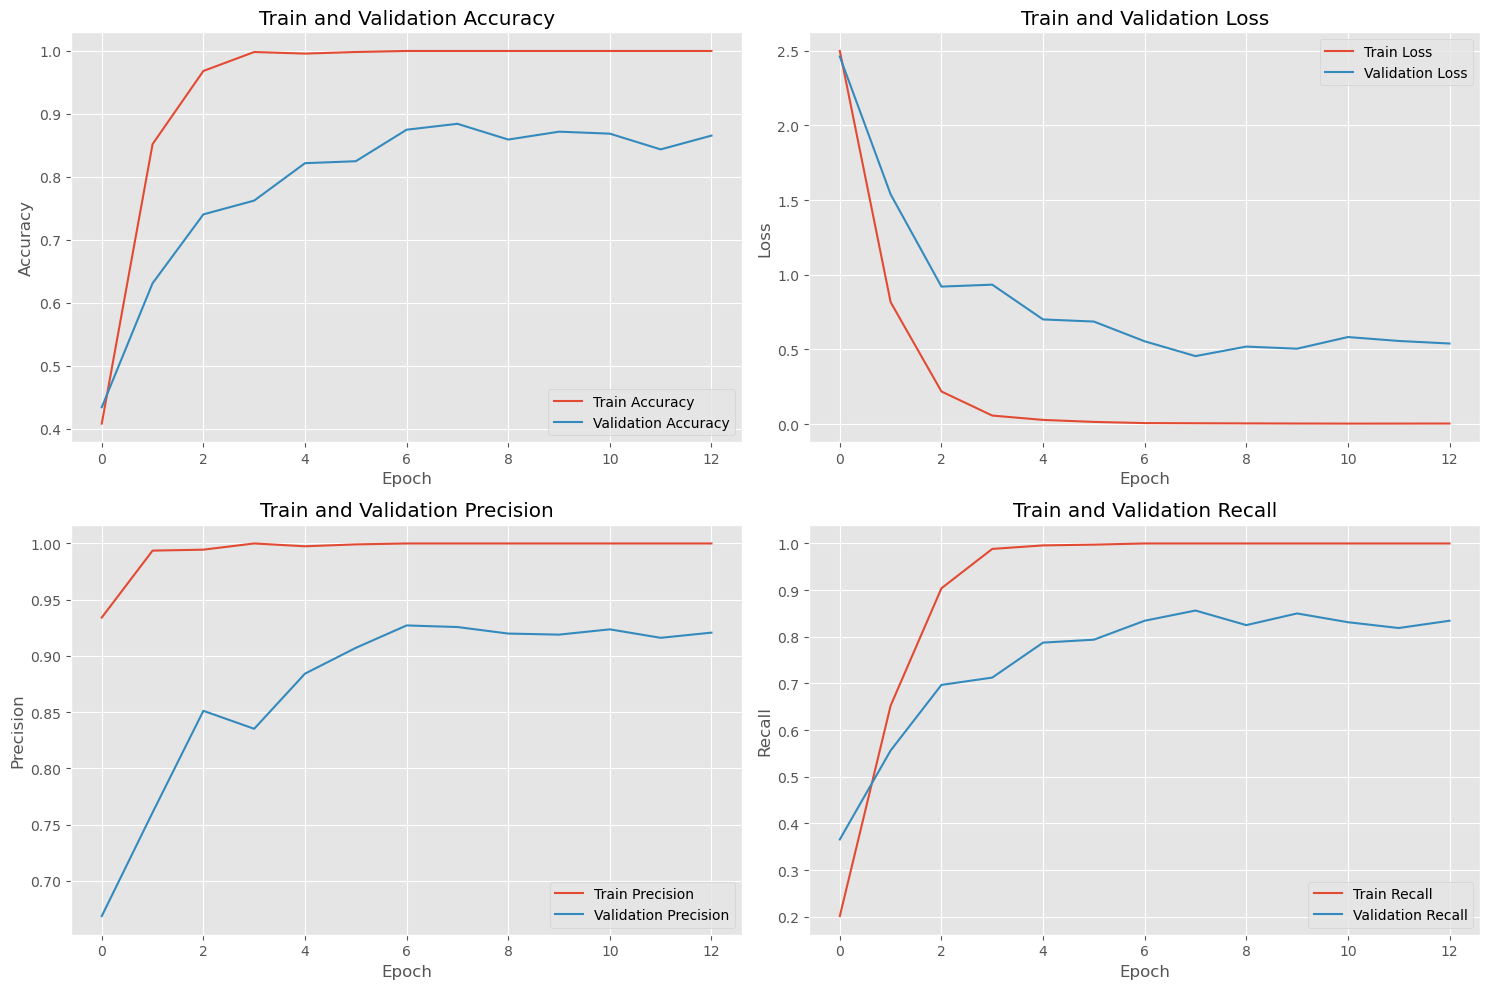

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Train and validation accuracy
axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy')
axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Train and Validation Accuracy')
axes[0, 0].legend()

# Train and validation loss
axes[0, 1].plot(history.history['loss'], label='Train Loss')
axes[0, 1].plot(history.history['val_loss'], label='Validation Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].set_title('Train and Validation Loss')
axes[0, 1].legend()

# Train and validation precision
axes[1, 0].plot(history.history['precision'], label='Train Precision')
axes[1, 0].plot(history.history['val_precision'], label='Validation Precision')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Train and Validation Precision')
axes[1, 0].legend()

# Train and validation recall
axes[1, 1].plot(history.history['recall'], label='Train Recall')
axes[1, 1].plot(history.history['val_recall'], label='Validation Recall')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_title('Train and Validation Recall')
axes[1, 1].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


1/1 [==============================] - 0s 30ms/step


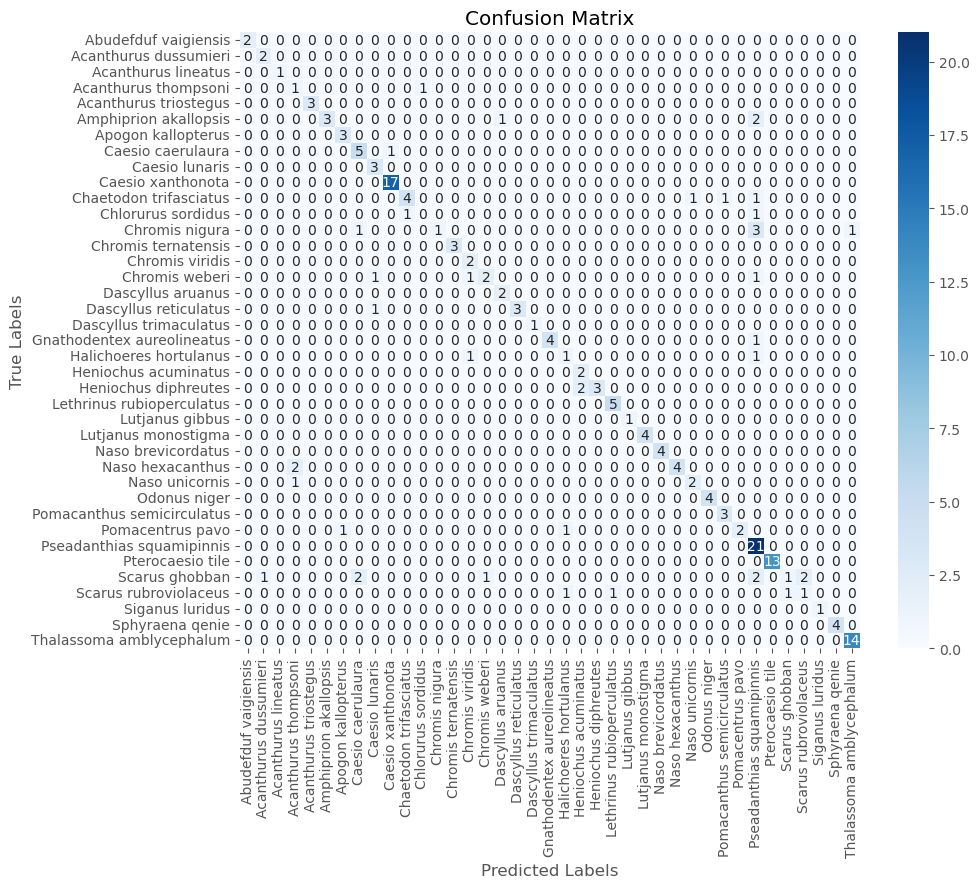

                            precision    recall  f1-score   support

      Abudefduf vaigiensis       1.00      1.00      1.00         2
     Acanthurus dussumieri       0.67      1.00      0.80         2
       Acanthurus lineatus       1.00      1.00      1.00         1
      Acanthurus thompsoni       0.25      0.50      0.33         2
     Acanthurus triostegus       1.00      1.00      1.00         3
     Amphiprion akallopsis       1.00      0.50      0.67         6
        Apogon kallopterus       0.75      1.00      0.86         3
         Caesio caerulaura       0.62      0.83      0.71         6
            Caesio lunaris       0.60      1.00      0.75         3
         Caesio xanthonota       0.94      1.00      0.97        17
    Chaetodon trifasciatus       0.80      0.57      0.67         7
        Chlorurus sordidus       0.00      0.00      0.00         2
            Chromis nigura       1.00      0.17      0.29         6
       Chromis ternatensis       1.00      1.00

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on the test dataset
# test_loss, test_accuracy = model.evaluate(test_dataset)
# print("Test accuracy:", test_accuracy)

# Create lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Predict labels for the test dataset
for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(np.argmax(labels.numpy(), axis=1))

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
target_names = class_names
report = classification_report(true_labels, predicted_labels, target_names=target_names)
print(report)


1/1 [==============================] - 0s 48ms/step


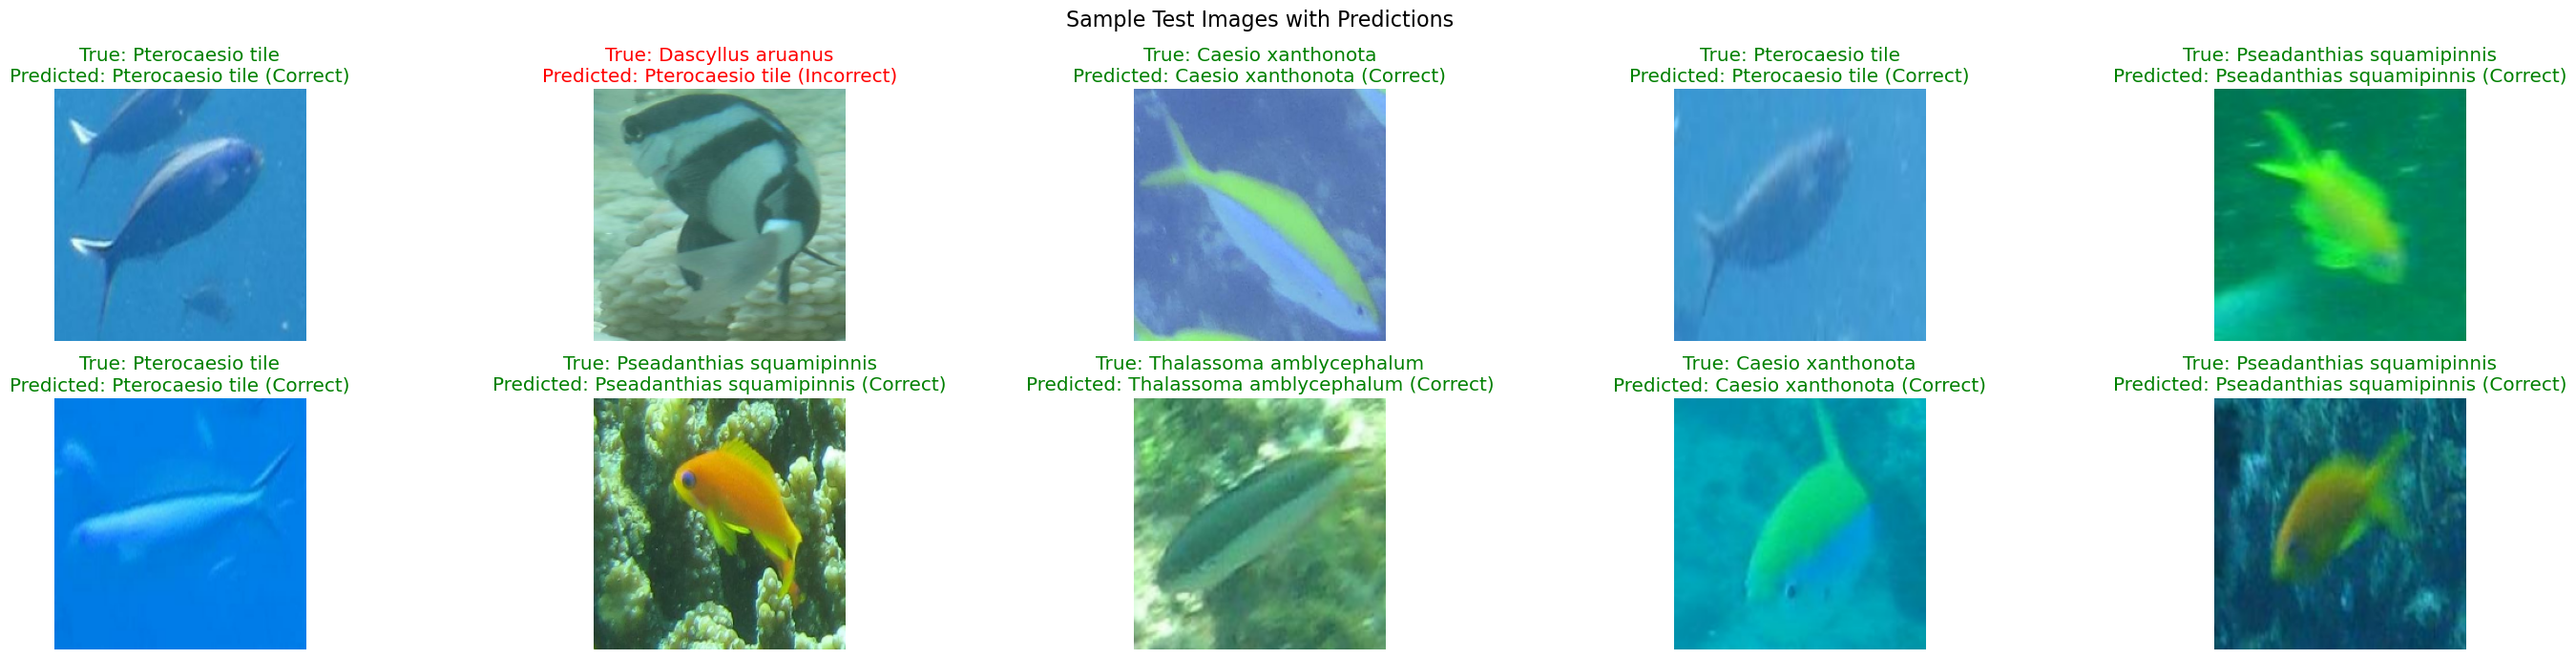

In [11]:

# Display a few sample images with their predictions
num_images_to_display = 10
fig, axes = plt.subplots(2, num_images_to_display // 2, figsize=(30, 7))
fig.suptitle('Sample Test Images with Predictions', fontsize=16)

for i, ax in enumerate(axes.ravel()):
    image, label = next(iter(test_dataset))
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions[0])
    true_label = np.argmax(label[0].numpy())

    ax.imshow(image[0].numpy().astype(np.uint8))
    
    if predicted_label == true_label:
        ax.set_title(f'True: {class_names[true_label]}\nPredicted: {class_names[predicted_label]} (Correct)', color='green')
    else:
        ax.set_title(f'True: {class_names[true_label]}\nPredicted: {class_names[predicted_label]} (Incorrect)', color='red')

    ax.axis('off')

plt.tight_layout()
plt.show()


# Sharpened Training

In [4]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from PIL import Image
import numpy as np

# Path to your sharpened dataset directory
path_to_fish_dataset = '/kaggle/input/plus20fish-saiab/morethan20fish_SAIAB_Sharpened/morethan20fish_SAIAB_Sharpened'

# List of classes (subdirectories)
class_names = os.listdir(path_to_fish_dataset)

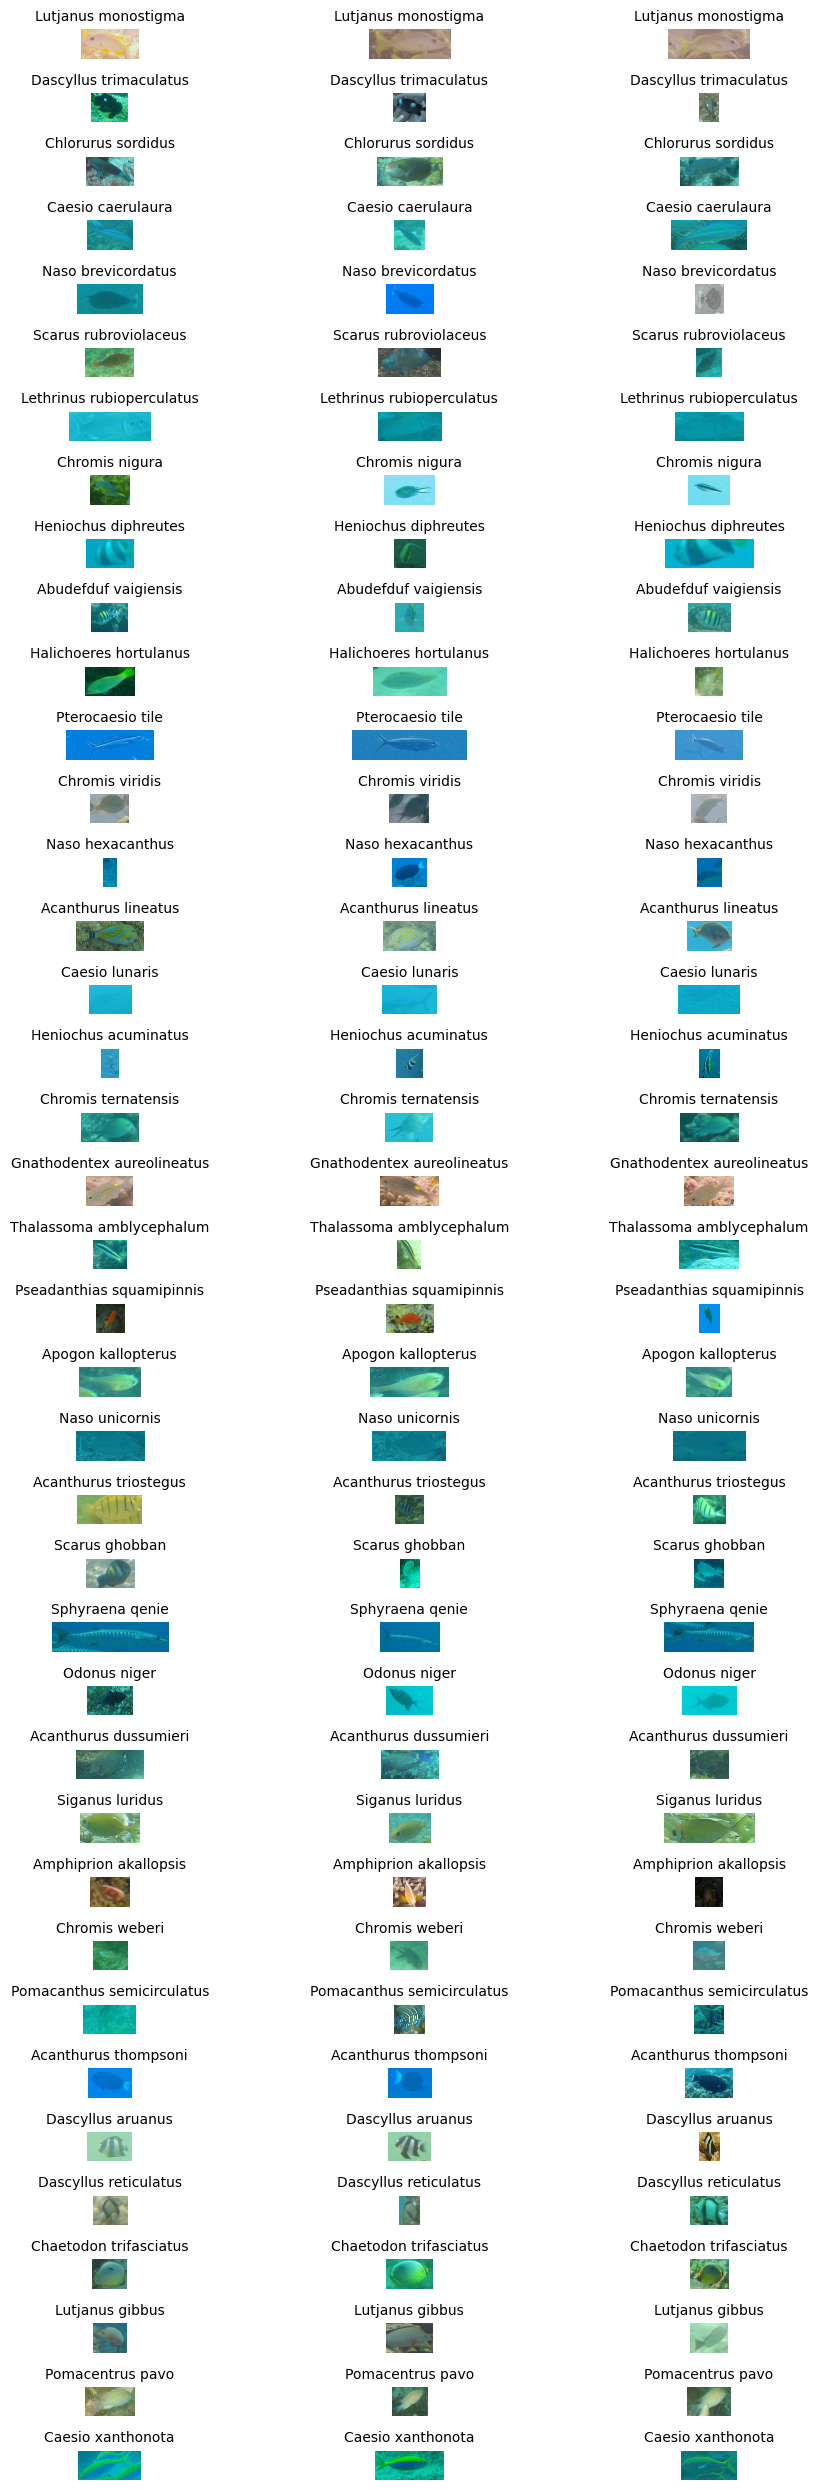

In [5]:
# Step 2: Sample Image Visualization
num_samples_per_class = 3
fig, axes = plt.subplots(len(class_names), num_samples_per_class, figsize=(10, 25))  # Adjust figsize
for i, cls in enumerate(class_names):
    image_files = os.listdir(os.path.join(path_to_fish_dataset, cls))
    sample_images = np.random.choice(image_files, num_samples_per_class, replace=False)
    for j, img_file in enumerate(sample_images):
        img_path = os.path.join(path_to_fish_dataset, cls, img_file)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(cls, fontsize=10)  # Adjust fontsize
plt.tight_layout()
plt.show()


In [6]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define paths to your dataset
path_to_fish_datasetectory = path_to_fish_dataset
batch_size = 32
image_size = (224, 224)

# Create training, validation, and test datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    path_to_fish_datasetectory,
    validation_split=0.3,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    path_to_fish_datasetectory,
    validation_split=0.3,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

# Retrieve class names
class_names = train_dataset.class_names

# Further split validation into validation and test
val_size = int(0.67 * len(test_dataset))
val_dataset = test_dataset.take(val_size)
test_dataset = test_dataset.skip(val_size)

# Normalize and preprocess the images
def preprocess_images(images, labels):
    #images = preprocess_input(images)
    images = images / 255.0  # Normalize by dividing by 255
    return images, labels

train_dataset = train_dataset.map(preprocess_images)
val_dataset = val_dataset.map(preprocess_images)
test_dataset = test_dataset.map(preprocess_images)

# One-hot encode labels
num_classes = len(class_names)
train_dataset = train_dataset.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
val_dataset = val_dataset.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
test_dataset = test_dataset.map(lambda x, y: (x, tf.one_hot(y, num_classes)))

# Print class names
print("Class names:", class_names)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Found 1709 files belonging to 39 classes.
Using 1197 files for training.
Found 1709 files belonging to 39 classes.
Using 512 files for validation.
Class names: ['Abudefduf vaigiensis', 'Acanthurus dussumieri', 'Acanthurus lineatus', 'Acanthurus thompsoni', 'Acanthurus triostegus', 'Amphiprion akallopsis', 'Apogon kallopterus', 'Caesio caerulaura', 'Caesio lunaris', 'Caesio xanthonota', 'Chaetodon trifasciatus', 'Chlorurus sordidus', 'Chromis nigura', 'Chromis ternatensis', 'Chromis viridis', 'Chromis weberi', 'Dascyllus aruanus', 'Dascyllus reticulatus', 'Dascyllus trimaculatus', 'Gnathodentex aureolineatus', 'Halichoeres hortulanus', 'Heniochus acuminatus', 'Heniochus diphreutes', 'Lethrinus rubioperculatus', 'Lutjanus gibbus', 'Lutjanus monostigma', 'Naso brevicordatus', 'Naso hexacanthus', 'Naso unicornis', 'Odonus niger', 'Pomacanthus semicirculatus', 'Pomacentrus pavo', 'Pseadanthias squamipinnis', 'Pterocaesio tile', 'Scarus ghobban', 'Scarus rubroviolaceus', 'Siganus luridus', '

In [7]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import time

def model_builder(hp):
    # Create the base model
    base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Add classification head on top of the base model
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=predictions)


    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Compile the model with additional metrics
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])
    
    return model

tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='model',
                     project_name='fish_kt')

# Define callbacks for saving models based on validation loss and early stopping
model_checkpoint_best = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
# model_checkpoint_last = ModelCheckpoint('last_model.h5', save_best_only=False, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Search for the best hyperparameters
tuner.search(train_dataset, epochs=50, validation_data=val_dataset, callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""The hyperparameter search is complete. The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.""")

Trial 3 Complete [00h 01m 04s]
val_loss: 1.510129690170288

Best val_loss So Far: 1.510129690170288
Total elapsed time: 00h 03m 09s
The hyperparameter search is complete. The optimal learning rate for the optimizer is 0.0001.


In [8]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
# history = model.fit(img_train, label_train, epochs=50, validation_split=0.2)

# Start timing the training
start_time = time.time()
# Train the model with callbacks
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[model_checkpoint_best, early_stopping])

# Calculate the training time
end_time = time.time()
training_time_seconds = end_time - start_time
training_time_minutes = training_time_seconds / 60.0  # Convert to minutes

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

print(f"training_time = {training_time_minutes}")

Epoch 1/50
38/38 [==============================] - ETA: 0s - loss: 2.6007 - accuracy: 0.3726 - precision: 0.9567 - recall: 0.1662
Epoch 1: val_loss improved from inf to 2.84730, saving model to best_model.h5
38/38 [==============================] - 39s 251ms/step - loss: 2.6007 - accuracy: 0.3726 - precision: 0.9567 - recall: 0.1662 - val_loss: 2.8473 - val_accuracy: 0.3469 - val_precision: 0.4924 - val_recall: 0.3031
Epoch 2/50
38/38 [==============================] - ETA: 0s - loss: 0.7912 - accuracy: 0.8705 - precision: 0.9785 - recall: 0.6449
Epoch 2: val_loss improved from 2.84730 to 1.79478, saving model to best_model.h5
38/38 [==============================] - 10s 247ms/step - loss: 0.7912 - accuracy: 0.8705 - precision: 0.9785 - recall: 0.6449 - val_loss: 1.7948 - val_accuracy: 0.6000 - val_precision: 0.6692 - val_recall: 0.5500
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 0.2023 - accuracy: 0.9799 - precision: 0.9972 - recall: 0.9073
Epoch 3: val_loss i

In [9]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_dataset)
print("Test accuracy:", test_accuracy)
print("Test precision:", test_precision)
print("Test recall:", test_recall)



6/6 [==============================] - 2s 58ms/step - loss: 0.5730 - accuracy: 0.8333 - precision: 0.8686 - recall: 0.7917
Test accuracy: 0.8333333134651184
Test precision: 0.868571400642395
Test recall: 0.7916666865348816


In [11]:
# Access training metrics from history
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
train_precision = history.history['precision']
train_recall = history.history['recall']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_precision = history.history['val_precision']
val_recall = history.history['val_recall']

# Continue with your plotting code for these metrics

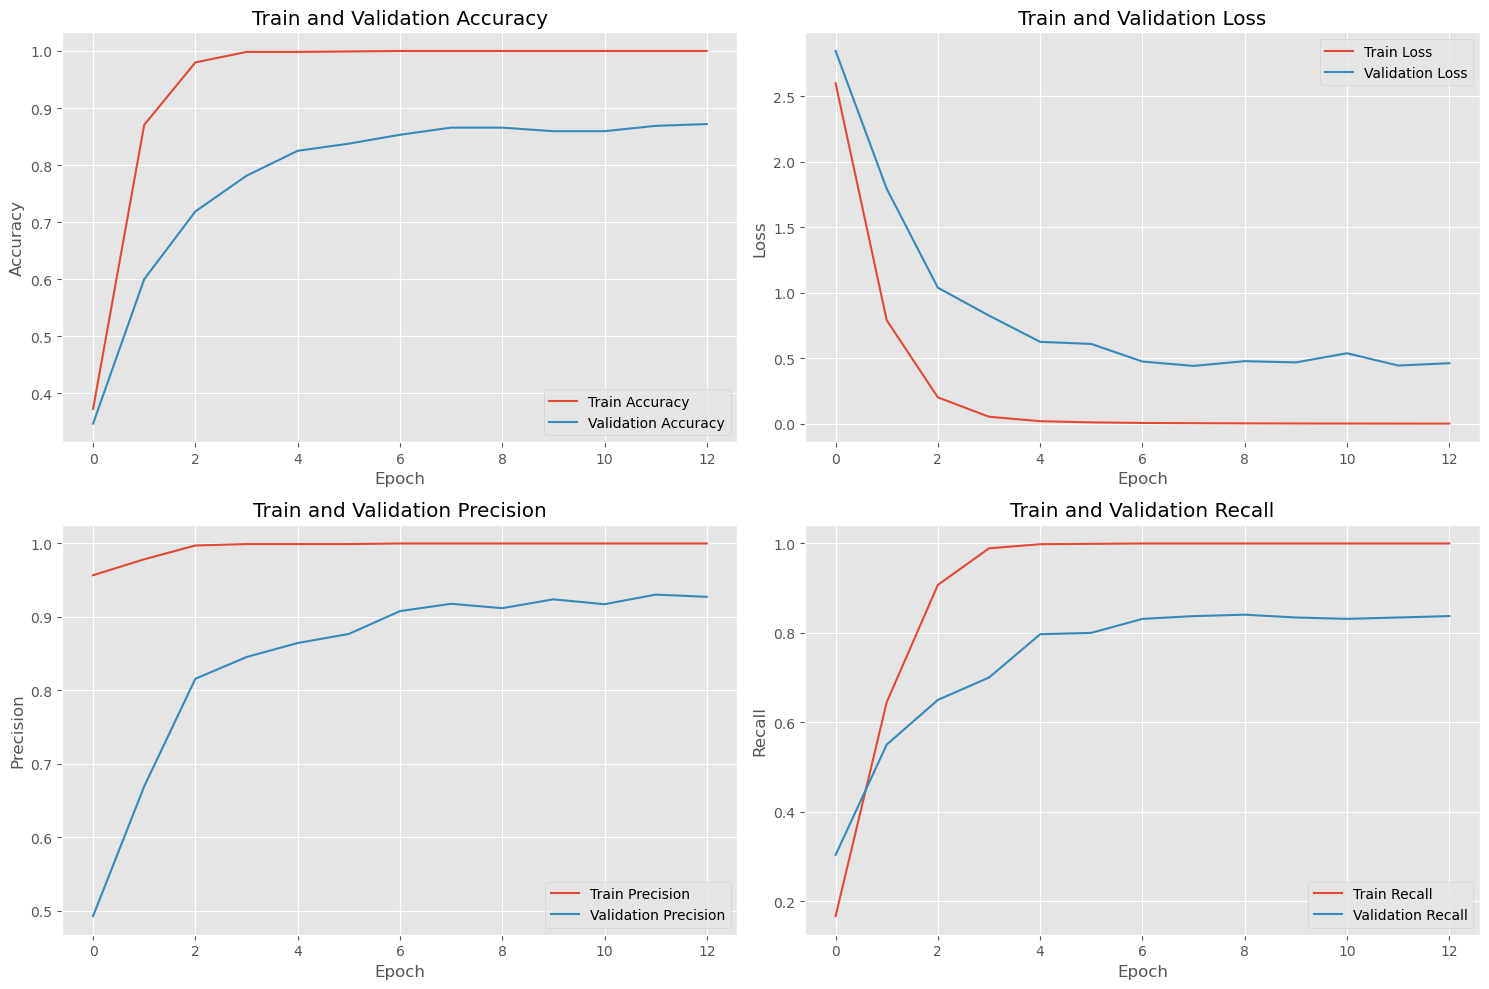

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Train and validation accuracy
axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy')
axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Train and Validation Accuracy')
axes[0, 0].legend()

# Train and validation loss
axes[0, 1].plot(history.history['loss'], label='Train Loss')
axes[0, 1].plot(history.history['val_loss'], label='Validation Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].set_title('Train and Validation Loss')
axes[0, 1].legend()

# Train and validation precision
axes[1, 0].plot(history.history['precision'], label='Train Precision')
axes[1, 0].plot(history.history['val_precision'], label='Validation Precision')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Train and Validation Precision')
axes[1, 0].legend()

# Train and validation recall
axes[1, 1].plot(history.history['recall'], label='Train Recall')
axes[1, 1].plot(history.history['val_recall'], label='Validation Recall')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_title('Train and Validation Recall')
axes[1, 1].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


1/1 [==============================] - 0s 30ms/step


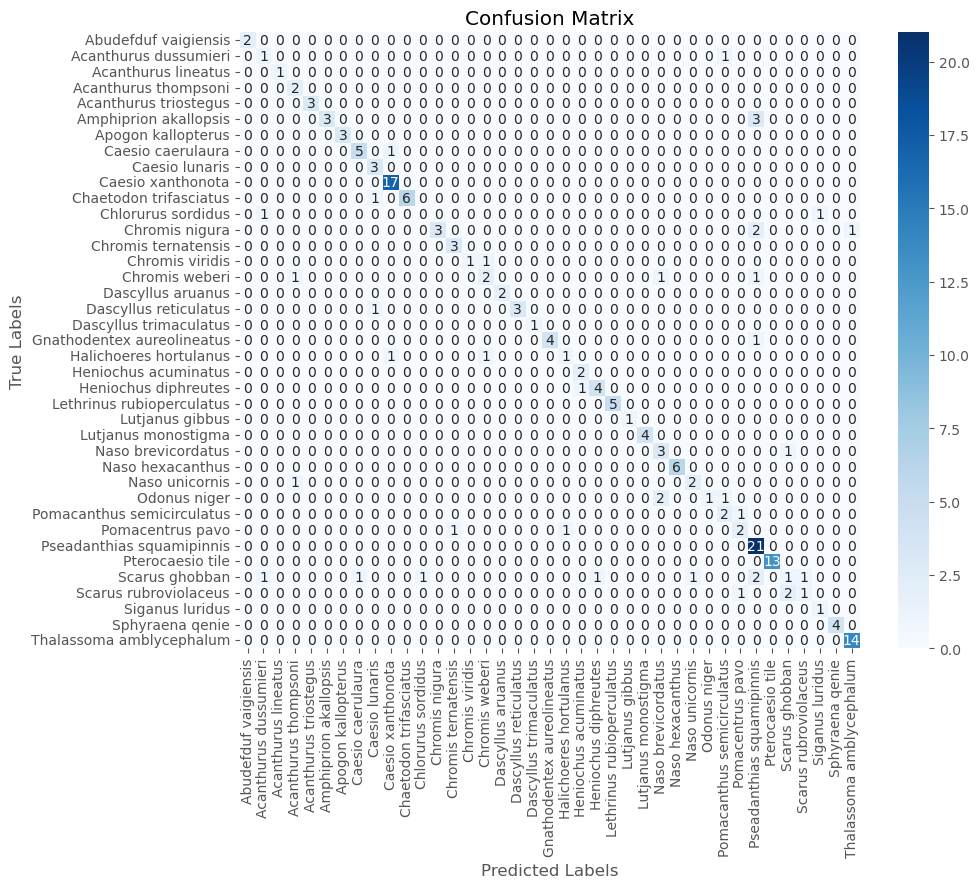

                            precision    recall  f1-score   support

      Abudefduf vaigiensis       1.00      1.00      1.00         2
     Acanthurus dussumieri       0.33      0.50      0.40         2
       Acanthurus lineatus       1.00      1.00      1.00         1
      Acanthurus thompsoni       0.50      1.00      0.67         2
     Acanthurus triostegus       1.00      1.00      1.00         3
     Amphiprion akallopsis       1.00      0.50      0.67         6
        Apogon kallopterus       1.00      1.00      1.00         3
         Caesio caerulaura       0.83      0.83      0.83         6
            Caesio lunaris       0.60      1.00      0.75         3
         Caesio xanthonota       0.89      1.00      0.94        17
    Chaetodon trifasciatus       1.00      0.86      0.92         7
        Chlorurus sordidus       0.00      0.00      0.00         2
            Chromis nigura       1.00      0.50      0.67         6
       Chromis ternatensis       0.75      1.00

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on the test dataset
# test_loss, test_accuracy = model.evaluate(test_dataset)
# print("Test accuracy:", test_accuracy)

# Create lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Predict labels for the test dataset
for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(np.argmax(labels.numpy(), axis=1))

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
target_names = class_names
report = classification_report(true_labels, predicted_labels, target_names=target_names)
print(report)

# Funie Images Training

In [14]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from PIL import Image
import numpy as np

# Path to your Funie-GAN generated dataset directory
path_to_fish_dataset = '/kaggle/input/plus20fish-saiab/morethan20fish_SAIAB_Funie/morethan20fish_SAIAB_Funie'

# List of classes (subdirectories)
class_names = os.listdir(path_to_fish_dataset)

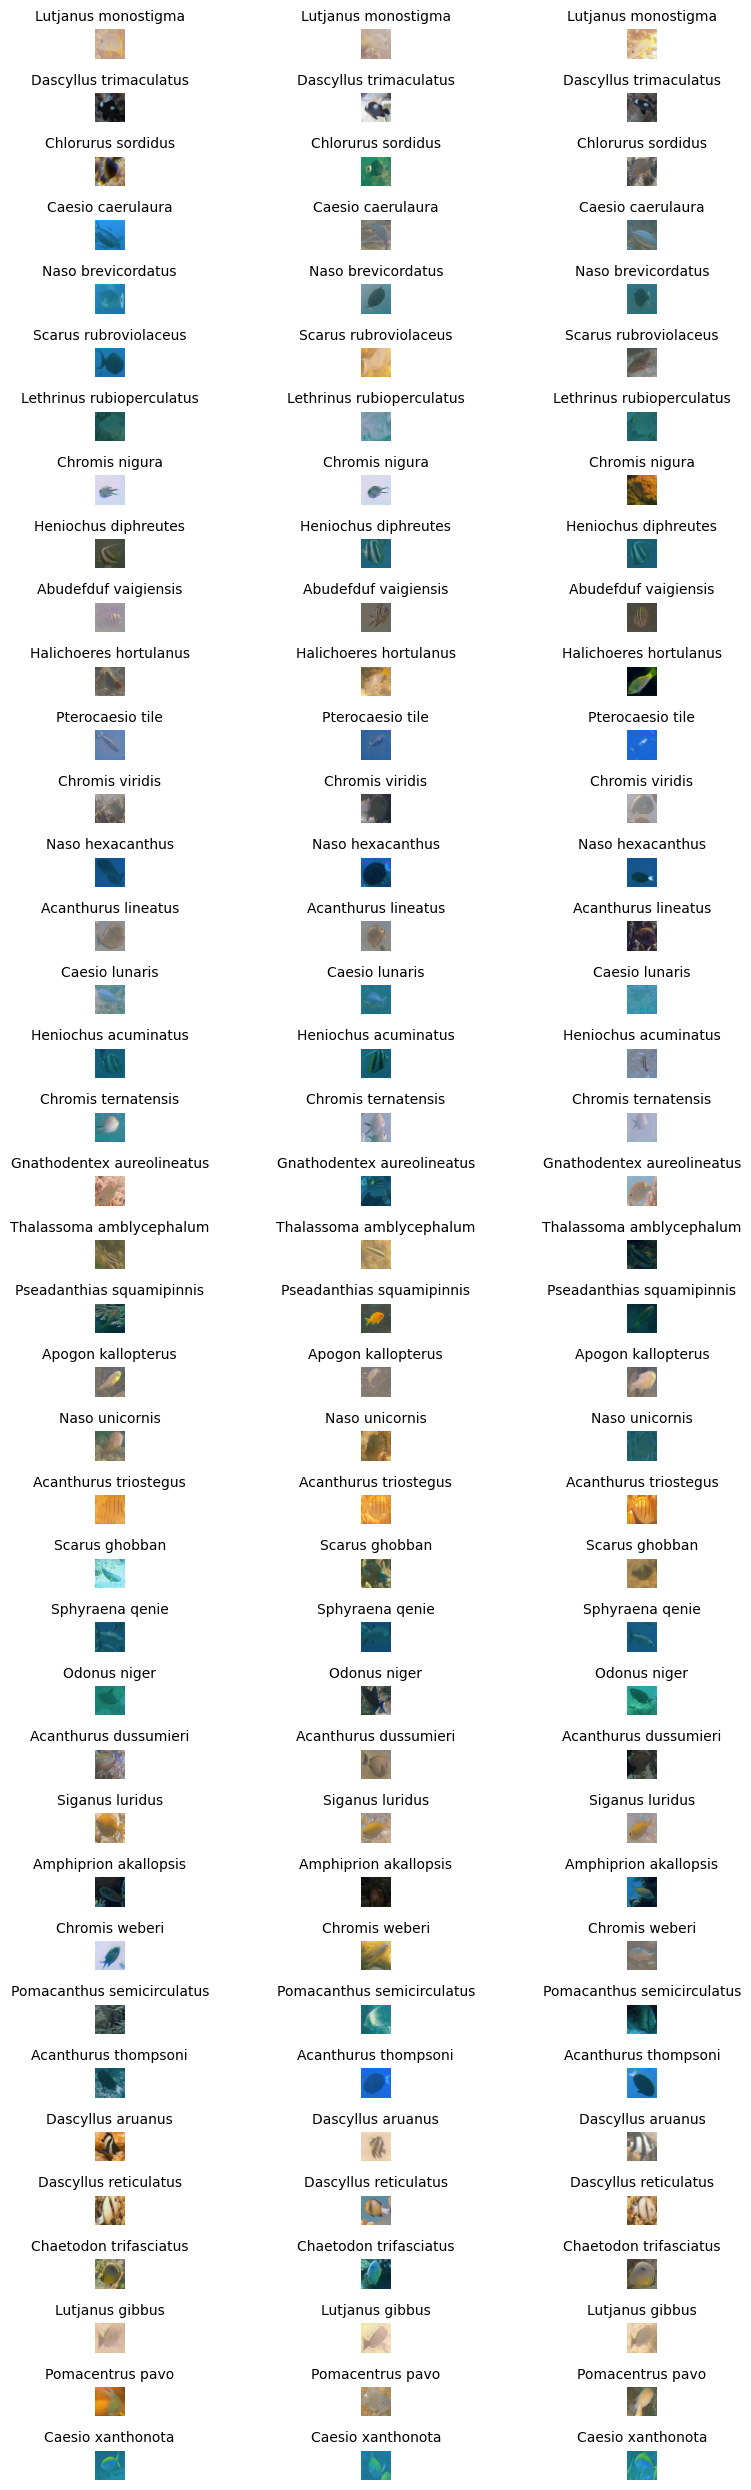

In [2]:
# Step 2: Sample Image Visualization
num_samples_per_class = 3
fig, axes = plt.subplots(len(class_names), num_samples_per_class, figsize=(10, 25))  # Adjust figsize
for i, cls in enumerate(class_names):
    image_files = os.listdir(os.path.join(path_to_fish_dataset, cls))
    sample_images = np.random.choice(image_files, num_samples_per_class, replace=False)
    for j, img_file in enumerate(sample_images):
        img_path = os.path.join(path_to_fish_dataset, cls, img_file)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(cls, fontsize=10)  # Adjust fontsize
plt.tight_layout()
plt.show()

In [15]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define paths to your dataset
path_to_fish_datasetectory = path_to_fish_dataset
batch_size = 32
image_size = (224, 224)

# Create training, validation, and test datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    path_to_fish_datasetectory,
    validation_split=0.3,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    path_to_fish_datasetectory,
    validation_split=0.3,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

# Retrieve class names
class_names = train_dataset.class_names

# Further split validation into validation and test
val_size = int(0.67 * len(test_dataset))
val_dataset = test_dataset.take(val_size)
test_dataset = test_dataset.skip(val_size)

# Normalize and preprocess the images
def preprocess_images(images, labels):
    #images = preprocess_input(images)
    images = images / 255.0  # Normalize by dividing by 255
    return images, labels

train_dataset = train_dataset.map(preprocess_images)
val_dataset = val_dataset.map(preprocess_images)
test_dataset = test_dataset.map(preprocess_images)

# One-hot encode labels
num_classes = len(class_names)
train_dataset = train_dataset.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
val_dataset = val_dataset.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
test_dataset = test_dataset.map(lambda x, y: (x, tf.one_hot(y, num_classes)))

# Print class names
print("Class names:", class_names)


Found 1709 files belonging to 39 classes.
Using 1197 files for training.
Found 1709 files belonging to 39 classes.
Using 512 files for validation.
Class names: ['Abudefduf vaigiensis', 'Acanthurus dussumieri', 'Acanthurus lineatus', 'Acanthurus thompsoni', 'Acanthurus triostegus', 'Amphiprion akallopsis', 'Apogon kallopterus', 'Caesio caerulaura', 'Caesio lunaris', 'Caesio xanthonota', 'Chaetodon trifasciatus', 'Chlorurus sordidus', 'Chromis nigura', 'Chromis ternatensis', 'Chromis viridis', 'Chromis weberi', 'Dascyllus aruanus', 'Dascyllus reticulatus', 'Dascyllus trimaculatus', 'Gnathodentex aureolineatus', 'Halichoeres hortulanus', 'Heniochus acuminatus', 'Heniochus diphreutes', 'Lethrinus rubioperculatus', 'Lutjanus gibbus', 'Lutjanus monostigma', 'Naso brevicordatus', 'Naso hexacanthus', 'Naso unicornis', 'Odonus niger', 'Pomacanthus semicirculatus', 'Pomacentrus pavo', 'Pseadanthias squamipinnis', 'Pterocaesio tile', 'Scarus ghobban', 'Scarus rubroviolaceus', 'Siganus luridus', '

In [8]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import time

def model_builder(hp):
    # Create the base model
    base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Add classification head on top of the base model
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=predictions)


    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Compile the model with additional metrics
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])
    
    return model

tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='model_funie',
                     project_name='fish_kt')

# Define callbacks for saving models based on validation loss and early stopping
model_checkpoint_best = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
# model_checkpoint_last = ModelCheckpoint('last_model.h5', save_best_only=False, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Search for the best hyperparameters
tuner.search(train_dataset, epochs=50, validation_data=val_dataset, callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""The hyperparameter search is complete. The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.""")

Trial 3 Complete [00h 01m 02s]
val_loss: 28.14691162109375

Best val_loss So Far: 1.14475417137146
Total elapsed time: 00h 02m 50s
The hyperparameter search is complete. The optimal learning rate for the optimizer is 0.0001.


In [16]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
# history = model.fit(img_train, label_train, epochs=50, validation_split=0.2)

# Start timing the training
start_time = time.time()
# Train the model with callbacks
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[model_checkpoint_best, early_stopping])

# Calculate the training time
end_time = time.time()
training_time_seconds = end_time - start_time
training_time_minutes = training_time_seconds / 60.0  # Convert to minutes

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

print(f"training_time = {training_time_minutes}")

Epoch 1/50
38/38 [==============================] - ETA: 0s - loss: 2.5822 - accuracy: 0.3885 - precision: 0.9415 - recall: 0.1612
Epoch 1: val_loss did not improve from 0.58197
38/38 [==============================] - 37s 252ms/step - loss: 2.5822 - accuracy: 0.3885 - precision: 0.9415 - recall: 0.1612 - val_loss: 2.6899 - val_accuracy: 0.4031 - val_precision: 0.5699 - val_recall: 0.3313
Epoch 2/50
38/38 [==============================] - ETA: 0s - loss: 0.7398 - accuracy: 0.8705 - precision: 0.9825 - recall: 0.6575
Epoch 2: val_loss did not improve from 0.58197
38/38 [==============================] - 7s 182ms/step - loss: 0.7398 - accuracy: 0.8705 - precision: 0.9825 - recall: 0.6575 - val_loss: 1.1645 - val_accuracy: 0.7000 - val_precision: 0.8207 - val_recall: 0.6438
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 0.1699 - accuracy: 0.9825 - precision: 0.9955 - recall: 0.9282
Epoch 3: val_loss did not improve from 0.58197
38/38 [==============================] 

In [17]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_dataset)
print("Test accuracy:", test_accuracy)
print("Test precision:", test_precision)
print("Test recall:", test_recall)



6/6 [==============================] - 1s 58ms/step - loss: 0.5842 - accuracy: 0.8490 - precision: 0.9123 - recall: 0.8125
Test accuracy: 0.8489583134651184
Test precision: 0.9122806787490845
Test recall: 0.8125


In [18]:
# Access training metrics from history
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
train_precision = history.history['precision']
train_recall = history.history['recall']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_precision = history.history['val_precision']
val_recall = history.history['val_recall']

# Continue with your plotting code for these metrics

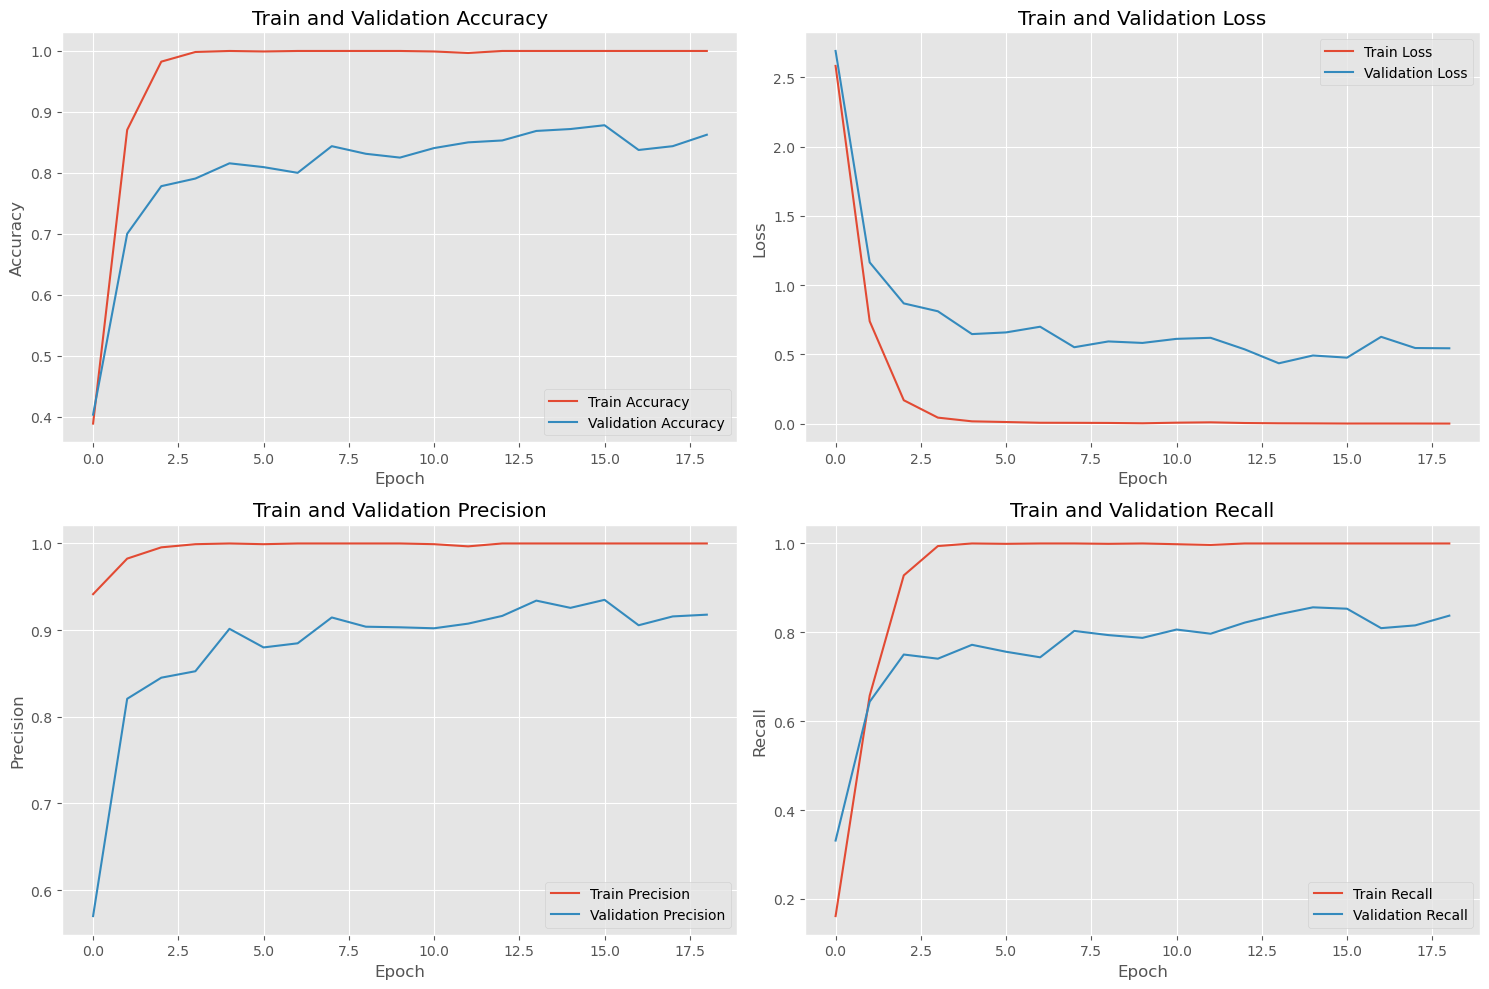

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Train and validation accuracy
axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy')
axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Train and Validation Accuracy')
axes[0, 0].legend()

# Train and validation loss
axes[0, 1].plot(history.history['loss'], label='Train Loss')
axes[0, 1].plot(history.history['val_loss'], label='Validation Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].set_title('Train and Validation Loss')
axes[0, 1].legend()

# Train and validation precision
axes[1, 0].plot(history.history['precision'], label='Train Precision')
axes[1, 0].plot(history.history['val_precision'], label='Validation Precision')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Train and Validation Precision')
axes[1, 0].legend()

# Train and validation recall
axes[1, 1].plot(history.history['recall'], label='Train Recall')
axes[1, 1].plot(history.history['val_recall'], label='Validation Recall')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_title('Train and Validation Recall')
axes[1, 1].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


1/1 [==============================] - 0s 31ms/step


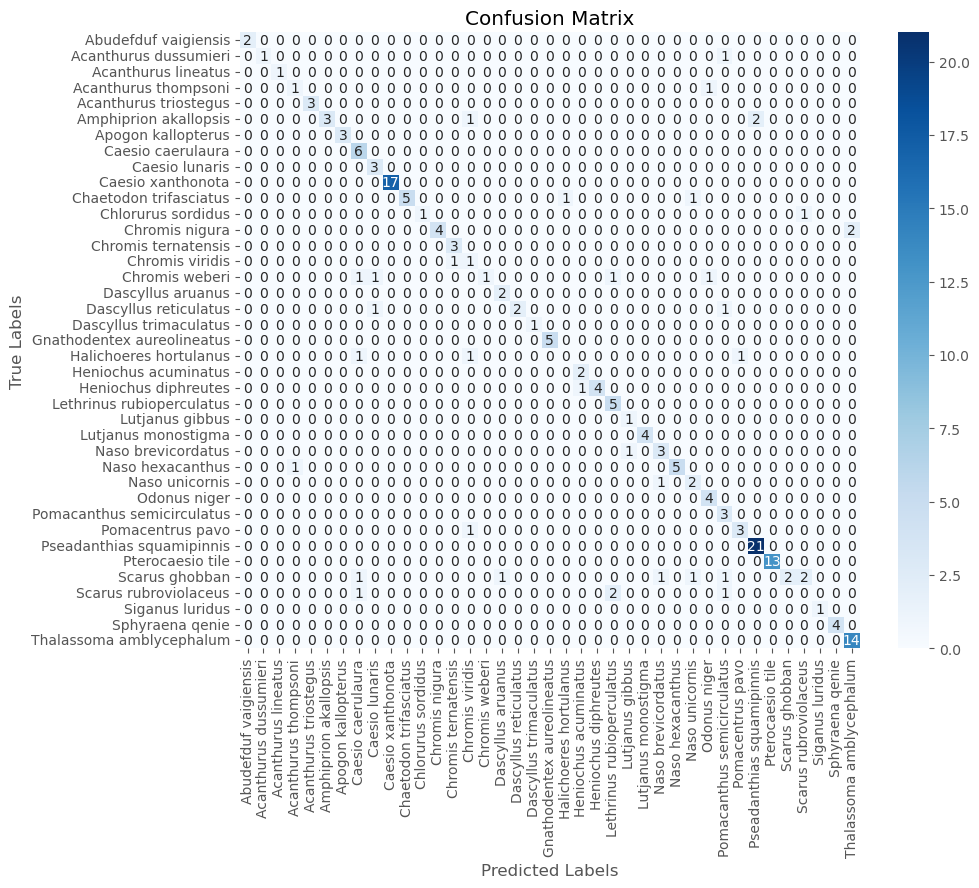

                            precision    recall  f1-score   support

      Abudefduf vaigiensis       1.00      1.00      1.00         2
     Acanthurus dussumieri       1.00      0.50      0.67         2
       Acanthurus lineatus       1.00      1.00      1.00         1
      Acanthurus thompsoni       0.50      0.50      0.50         2
     Acanthurus triostegus       1.00      1.00      1.00         3
     Amphiprion akallopsis       1.00      0.50      0.67         6
        Apogon kallopterus       1.00      1.00      1.00         3
         Caesio caerulaura       0.60      1.00      0.75         6
            Caesio lunaris       0.60      1.00      0.75         3
         Caesio xanthonota       1.00      1.00      1.00        17
    Chaetodon trifasciatus       1.00      0.71      0.83         7
        Chlorurus sordidus       1.00      0.50      0.67         2
            Chromis nigura       1.00      0.67      0.80         6
       Chromis ternatensis       0.75      1.00

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on the test dataset
# test_loss, test_accuracy = model.evaluate(test_dataset)
# print("Test accuracy:", test_accuracy)

# Create lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Predict labels for the test dataset
for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(np.argmax(labels.numpy(), axis=1))

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
target_names = class_names
report = classification_report(true_labels, predicted_labels, target_names=target_names)
print(report)